

# COGS 108 - Final Project

# Overview

## TODO


# Names
Joyaan Bhesania
Navid Nezamabadi
Jonathan Titus
Garo Adjoian
Juan Sandoval

# Group Members IDs
A13494425

## TODO

# Research Question
 How does GDP affect suicide rates across various sexes and age groups from 1985 to 2016?   


# Background and Prior Work
The data that the team intends to use for analysis is an amalgamation of data from four primary datasets. The Human Development Index (HDI) data was pulled from the United Nations Development Program database, while the GDP and GDP per/capita came from the World Bank, and the figures for global suicide rates came from the World Health Organization & “Suicide in the Twenty-First Century” (Szamil, 2017). The four different sources provided data on their respective fields from the mid-1980's until the mid-2010’s. It is worth noting that in their analysis, the World Health Organization & Szamil both based their findings on age-standardized suicide rates done in suicides per/100,000 population to properly assess the global situation. These initial reports showed that men were much more prone to commit suicide than their female counter parts, young people were not particularly at risk to commit suicide when compared to other age groups regardless of country, and that overall global sucide rates were going down. In relating GDP to suicide rates, the group sought reference from prior studies including “Relationship of suicide rates to economic variables in Europe: 2000–2011” (by The British Journal of Psychiatry) and “Worldwide impact of economic cycles on suicide trends over 3 decades: differences according to level of development. A mixed effect model study” (by BMJ Journals). 

In their report, BMJ constasted the PPP (purchasing power parity) adjusted GDP per/capita with the suicide rates of countries grouped by the “Global Burden of Disease Study’s regional classification system”. They reported that in most of Latin America, Southeastern Asia and China/Korea/Japan there was a visible positive correlation between an increase in PPP per capita and suicide rates. Conversely, they reported that in the more developed Western Nations (Western&Central Europe and North America) there appeared to be a negative correlation between an increase in PPP per capita and suicide rates. The report went on to state there was no significant observable correlation between the two variables in sub-Saharan Africa and the Middle East/North Africa. The report stated that fast economic growth unaccompanied by strengthened socioeconomic and state institutions was likely reason for this phenomena in the developing world. Lastly, BMJ’s report acknowledged some of the studies shortcomings, notably not being able to account for microsocioecnomic confounding factors such as: unemployment rate, divorce rate, urban/rural divide, and alcohol consumption rate. 

Contrary to the findings of the BJM, the British Journal of Psychiatry was unable to correlate GDP per capita to suicide rates. They gathered data from 29 European countries consisting of suicide rates in males and females, unemployment rates, GDP per capita, economic growth rate per annum and inflation. They found that for males all of the aforementioned economic factors were correlated with suicide except GDP per capita. The findings were even less significant for females, where it was discovered that only the unemployment rate was correlated with the suicide rate. However, the authors did acknowledge that the study was based on aggregated data from each nation’s respective statistical agencies which would result in asymmetric data from various nations leading to possible “cross-level” and “aggregate bias” in the report’s findings. 

References (include links):

1) https://bmjopen.bmj.com/content/2/3/e000785 

2) https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/relationship-of-suicide-rates-to-economic-variables-in-europe-20002011/BED5FCDDA918CE73A5390249B83F0C57 

# Hypothesis
Fill in your hypotheses here
TODO


# Dataset(s)
Fill in your dataset information here
TODO with special note that our proposal only talks about one of the datasrts we used so we have to write more stuff about merging and find that dataset

(Copy this information for each dataset)

Dataset Name:
Link to the dataset:
Number of observations:
1-2 sentences describing each dataset.

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#For heatmaps
#from collections import defaultdict
#import pygal
#from pygal_maps_world.maps import World

#For linear modeling
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

df_init = pd.read_csv("master.csv")
df_HDI = pd.read_csv("Human development index (HDI).csv", encoding ='latin1')

In [3]:
df_init.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Data Cleaning

In [4]:
df_HDI.Country = df_HDI.Country.str.lstrip()

In [5]:
df_HDI = pd.melt(df_HDI, id_vars=["Country"], var_name=['Year'],value_name="HDI")
df_HDI = df_HDI.sort_values(["Country", "Year"])
df_HDI = df_HDI.reset_index(drop=True)

In [6]:
for index, row in df_HDI.iterrows():
    df_init.loc[(df_init['country'] == row['Country']) & (df_init['year'] == int(row['Year'])), 'HDI for year'] = row['HDI']

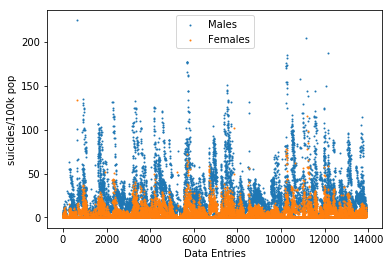

In [7]:
data = df_init

males = data[data['sex'] == 'male']
females = data[data['sex'] != 'male']

men_mean = pd.DataFrame.mean(males['suicides/100k pop'])
men_median = pd.DataFrame.median(males['suicides/100k pop'])
men_max = pd.DataFrame.max(males['suicides/100k pop'])

plt.scatter(range(len(males['suicides/100k pop'])), males['suicides/100k pop'], s = 1,)
plt.scatter(range(len(males['suicides/100k pop'])), females['suicides/100k pop'], s = 1)
plt.xlabel('Data Entries')
plt.ylabel('suicides/100k pop')
plt.legend(('Males', 'Females'))
plt.show()

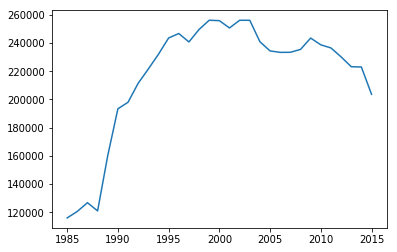

In [37]:
data = data[data['year'] != 2016]
data = data[data['suicides_no'] != 0]

years_dictionary = dict()
for i,j in data.iterrows():
    if j['year'] in years_dictionary:
        years_dictionary[j['year']] += j['suicides_no']
    else:
        years_dictionary[j['year']] = j['suicides_no']
lists = sorted(years_dictionary.items())
years, deaths = zip(*lists)
plt.plot(years, deaths)
plt.show()

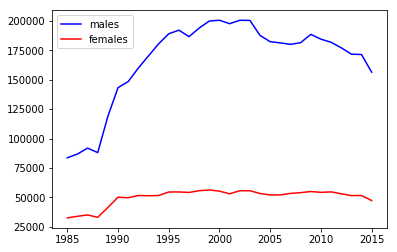

In [57]:
years_male_dictionary = dict()
for i,j in data[data.sex == 'male'].iterrows():
    if j['year'] in years_male_dictionary:
        years_male_dictionary[j['year']] += j['suicides_no']
    else:
        years_male_dictionary[j['year']] = j['suicides_no']
list_male = sorted(years_male_dictionary.items())
years_male, deaths_male = zip(*list_male)

years_female_dictionary = dict()
for i,j in data[data.sex == 'female'].iterrows():
    if j['year'] in years_female_dictionary:
        years_female_dictionary[j['year']] += j['suicides_no']
    else:
        years_female_dictionary[j['year']] = j['suicides_no']
list_female = sorted(years_female_dictionary.items())
years_female, deaths_female = zip(*list_female)

plt.plot(years_male, deaths_male, color = 'b')
plt.plot(years_female, deaths_female, color = 'r')
plt.legend(['males', 'females'])
plt.show()

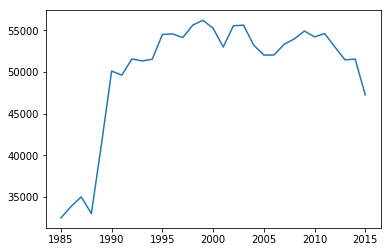

In [48]:
years_dictionary = dict()
for i,j in data[data.sex == 'female'].iterrows():
    if j['year'] in years_dictionary:
        years_dictionary[j['year']] += j['suicides_no']
    else:
        years_dictionary[j['year']] = j['suicides_no']
lists = sorted(years_dictionary.items())
years, deaths = zip(*lists)
plt.plot(years, deaths)
plt.show()

In [45]:
print(data[data.year == 1985])

              country  year     sex          age  suicides_no  population  \
588         Argentina  1985    male    75+ years          202      363000   
589         Argentina  1985    male  55-74 years          485     1997000   
590         Argentina  1985    male  35-54 years          414     3346300   
591         Argentina  1985  female  55-74 years          210     2304000   
592         Argentina  1985    male  25-34 years          177     2234200   
593         Argentina  1985  female    75+ years           41      537000   
594         Argentina  1985    male  15-24 years          156     2415200   
595         Argentina  1985  female  35-54 years          142     3355300   
596         Argentina  1985  female  25-34 years           65     2185200   
597         Argentina  1985  female  15-24 years           69     2354200   
598         Argentina  1985    male   5-14 years           16     3044200   
599         Argentina  1985  female   5-14 years           11     2955200   

In [39]:
strings = ['population', 'gdp_per_capita ($)', 'HDI for year']
genders = ['male', 'female']
years = [1985, 1990, 1995, 2000, 2005, 2010, 2015]
for gender in genders:
    print(gender)
    for string in strings:
        print('\t' + string)
        for year in years:
            tempdf = data[data['year'] == year]
            temp_df = tempdf[data['sex'] == gender]
            print('\t\t' + string + ':\t' + str(temp_df[string].corr(temp_df['suicides/100k pop'])))

male
	population
		population:	-0.10531346201756007
		population:	-0.0487049870422799
		population:	-0.05384196337197888
		population:	-0.046557904218252
		population:	-0.011653915456042399
		population:	-0.03481810407475337
		population:	-0.03109228230156621
	gdp_per_capita ($)
		gdp_per_capita ($):	0.08356885842947342
		gdp_per_capita ($):	0.19721064440735747
		gdp_per_capita ($):	-0.01055834952588367
		gdp_per_capita ($):	-0.023153207924868795
		gdp_per_capita ($):	-0.038380691658979574
		gdp_per_capita ($):	-0.030172059720059805
		gdp_per_capita ($):	-0.009583311228682652
	HDI for year
		HDI for year:	0.17405288787934917
		HDI for year:	0.23348687726603146
		HDI for year:	0.03067879455305048
		HDI for year:	0.08726662242106616
		HDI for year:	0.11900662241642161
		HDI for year:	0.10668048419975483
		HDI for year:	0.1594099976649908
female
	population
		population:	-0.0835904645730415
		population:	-0.04660089843067218
		population:	-0.06804738117381566
		population:	-0.068080992104

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Pr


		population:	-0.012454517317050353
	gdp_per_capita ($)
		gdp_per_capita ($):	0.1067586935722393
		gdp_per_capita ($):	0.21859779386888906
		gdp_per_capita ($):	0.10800207330110913
		gdp_per_capita ($):	0.0545662417482336
		gdp_per_capita ($):	0.07023739220515314
		gdp_per_capita ($):	0.07256984773806426
		gdp_per_capita ($):	0.16206802151686384
	HDI for year
		HDI for year:	0.15604064734437756
		HDI for year:	0.19907240588697586
		HDI for year:	0.10490741996484093
		HDI for year:	0.12779614836221165
		HDI for year:	0.1766397764761663
		HDI for year:	0.11938861002766296
		HDI for year:	0.2732350579395424


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Pr

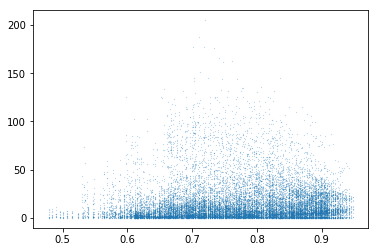

In [40]:
plt.scatter(data['HDI for year'], data['suicides/100k pop'], s = .01)
plt.show()

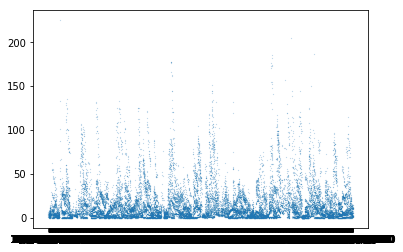

In [41]:
plt.scatter(data[' gdp_for_year ($) '], data['suicides/100k pop'], s = .01)
plt.show()

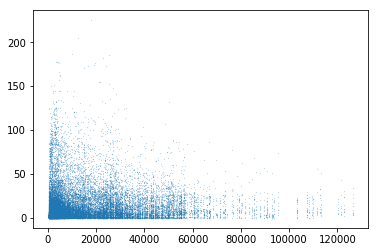

In [42]:
plt.scatter(data['gdp_per_capita ($)'], data['suicides/100k pop'], s = .01)
plt.show()

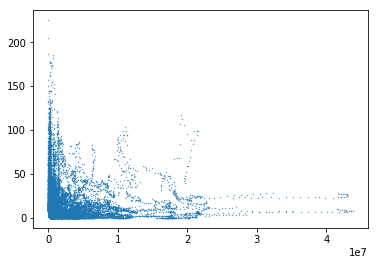

In [43]:
plt.scatter(data['population'], data['suicides/100k pop'], s = .1)
plt.show()

## Building Heat Map

In [19]:
country_codes = pd.read_csv("country_codes.csv", header=None, names=['Country Code', 'Country'])

In [20]:
def generate_map(year, gender):
    df_temp = data.loc[(data['year'] <= year) & (data['age'] == '25-34 years') & (data['sex'] == gender)]
    heat_map = defaultdict(int)
    for index, rows in df_temp.iterrows():
        if rows['country'] in country_codes.Country.values:
            country_code = country_codes.loc[country_codes['Country'] == rows['country']]['Country Code'].values[0]
            if heat_map[country_code] != 0:
                continue
            else:
                heat_map[country_code] = abs(df_temp.loc[rows['country'] == df_temp['country']]['HDI for year'].corr(df_temp.loc[rows['country'] == df_temp['country']]['suicides/100k pop']))
    return heat_map

In [21]:
world_map = World()
heat_map = generate_map(2015, 'male')
world_map.title = "Correlation between HDI and Suicide Rate for Young Adult Males"
world_map.add('1985-2015',heat_map)
world_map.render_to_file('heat_map.svg')

In [22]:
from IPython.core.display import SVG

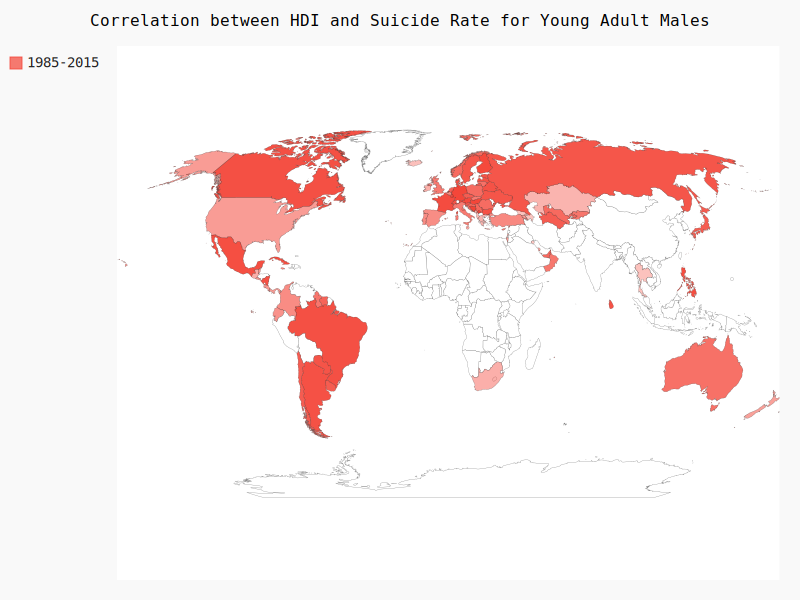

In [23]:
SVG(filename='heat_map.svg')

In [24]:
world_map_female = World()
heat_map_female = generate_map(2015, 'female')
world_map_female.title = "Correlation between HDI and Suicide Rate for Young Adult Females"
world_map_female.add('1985-2015',heat_map_female)
world_map_female.render_to_file('heat_map_female.svg')

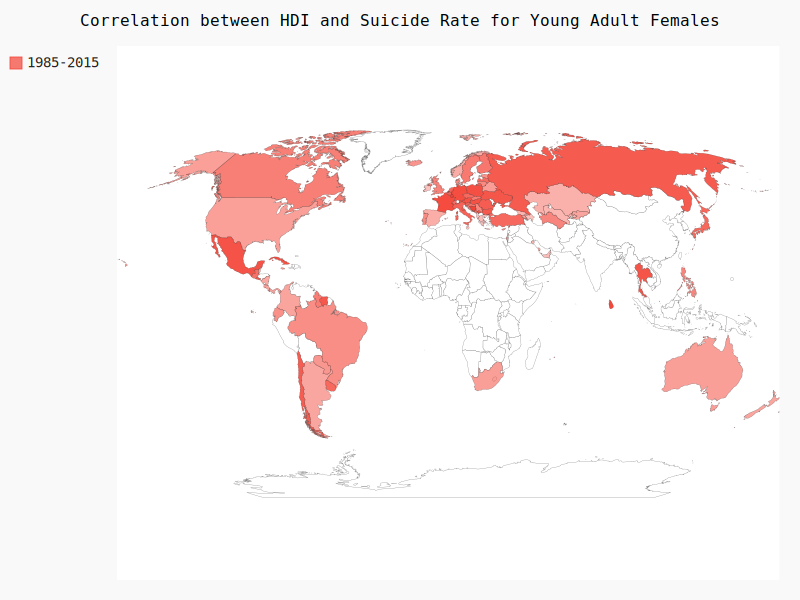

In [25]:
SVG(filename='heat_map_female.svg')

## Linear Modeling and Factors

In [26]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [27]:
data = data.dropna()
data.columns = data.columns.str.replace('HDI for year','HDI_for_year')
data.columns = data.columns.str.replace('suicides/100k pop','suicides_Per_100kpop')
data.head()
outcome, predictors = patsy.dmatrices('suicides_no ~ age + sex + HDI_for_year', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())
outcome, predictors = patsy.dmatrices('suicides_Per_100kpop ~ age + sex + HDI_for_year', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sun, 02 Jun 2019   Prob (F-statistic):          1.89e-320
Time:                        19:53:59   Log-Likelihood:            -1.8677e+05
No. Observations:               22626   AIC:                         3.736e+05
Df Residuals:                   22618   BIC:                         3.736e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -643.4344     53

Our goal was to see the correlation across genders and across age groups as we created a linear model and analyzed its factors. We first created a linear model based on age, sex, and HDI for the year to find the number of suicides. This showed us something we have already seen earlier: that being male increases your chances of commiting suicide greatly. However, it also showed us that the following age groups had the highest correlation to suicide numbers: 35-54, 55-74, 25-34, respectively. The remaining age groups, 75+ and 5-14, had a negative coefficient. However, when we performed the same linear analysis a second time with the same factors to find suicide rate per 100k populaion instead of suicides numbers, we found quite different results for the 75+ age group. Since the number of people over 75 is low, their suicide rates were not accurately represented with numbers. When taking rates per population into account instead of numbers, they went from haing a negative coefficent to having the highest coefficient across all age groups. This is a more accurate representation, and our final ordering of age groups more correlated with suicide rates is 75+, 55-74, 35-54, 25-34, respectively in order from highest to lowest correlation.  

Another important note about these correlations is that HDI_for_year was the strongest correlation in our first analysis and the third strongest correlation (after being male and 75+) by a very small margin. This indicates HDI has a very strong factor in suicide rates as we have seen in our heatmaps previously. 